In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [24]:
from keras import models
from keras import layers
 
network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

network.add(layers.Flatten())
network.add(layers.Dropout(.5))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

In [26]:
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'data/small/train'
validation_dir = 'data/small/validation'
test_dir = 'data/small/test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [12]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

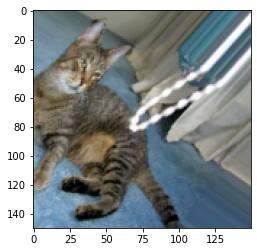

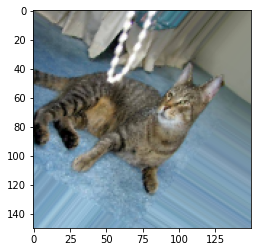

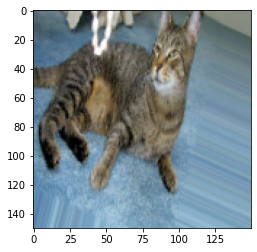

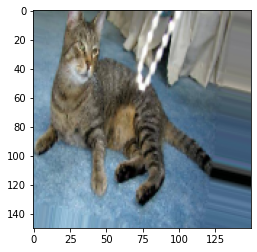

In [15]:
# This is module with image preprocessing utilities
import os
from keras.preprocessing import image

train_cats_dir = 'data/small/train/cats'
 
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
 
# We pick one image to "augment"
img_path = fnames[3]
 
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))
 
# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
 
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
 
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
 
plt.show()

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
 
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
 
history = network.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

network.save('cats_and_dogs_small_1.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 53s 529ms/step - loss: 0.7347 - accuracy: 0.5327 - val_loss: 0.6727 - val_accuracy: 0.6307
Epoch 2/100
100/100 [==============================] - 50s 500ms/step - loss: 0.6930 - accuracy: 0.5403 - val_loss: 0.6311 - val_accuracy: 0.6372
Epoch 3/100
100/100 [==============================] - 49s 489ms/step - loss: 0.6945 - accuracy: 0.6033 - val_loss: 0.6305 - val_accuracy: 0.6453
Epoch 4/100
100/100 [==============================] - 48s 482ms/step - loss: 0.6488 - accuracy: 0.6366 - val_loss: 0.6831 - val_accuracy: 0.5773
Epoch 5/100
100/100 [==============================] - 48s 476ms/step - loss: 0.6377 - accuracy: 0.6417 - val_loss: 0.6260 - val_accuracy: 0.7069
Epoch 6/100
100/100 [==============================] - 51s 507ms/step - loss: 0.6227 - accuracy: 0.6654 - val_loss: 0.8749 - val_accuracy: 0.5477
Epoch 7/100
100/100 [===================

100/100 [==============================] - 47s 467ms/step - loss: 0.3761 - accuracy: 0.8474 - val_loss: 0.3530 - val_accuracy: 0.8338
Epoch 57/100
100/100 [==============================] - 47s 474ms/step - loss: 0.3784 - accuracy: 0.8387 - val_loss: 0.4420 - val_accuracy: 0.8022
Epoch 58/100
100/100 [==============================] - 47s 472ms/step - loss: 0.3621 - accuracy: 0.8464 - val_loss: 0.4609 - val_accuracy: 0.8357
Epoch 59/100
100/100 [==============================] - 47s 467ms/step - loss: 0.3776 - accuracy: 0.8412 - val_loss: 0.3732 - val_accuracy: 0.8112
Epoch 60/100
100/100 [==============================] - 47s 473ms/step - loss: 0.3724 - accuracy: 0.8477 - val_loss: 0.2204 - val_accuracy: 0.7678
Epoch 61/100
100/100 [==============================] - 47s 471ms/step - loss: 0.3667 - accuracy: 0.8479 - val_loss: 0.3638 - val_accuracy: 0.7680
Epoch 62/100
100/100 [==============================] - 47s 474ms/step - loss: 0.3555 - accuracy: 0.8486 - val_loss: 0.3926 - val_a

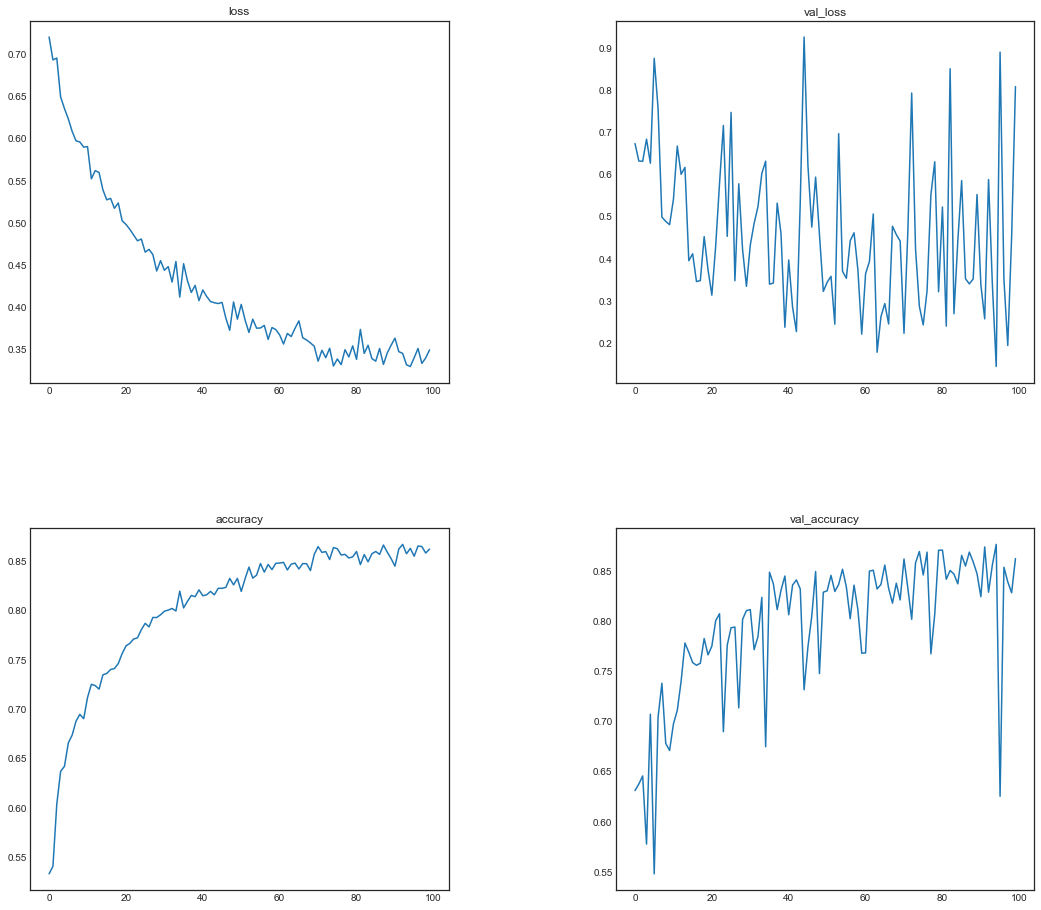

In [28]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

fig = plt.figure(figsize=(18, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2, 2, 1)
plt.title('loss')
plt.plot(history_dict['loss'])
plt.subplot(2, 2, 2)
plt.title('val_loss')
plt.plot(history_dict['val_loss'])
plt.subplot(2, 2, 3)
plt.title('accuracy')
plt.plot(history_dict['accuracy'])
plt.subplot(2, 2, 4)
plt.title('val_accuracy')
plt.plot(history_dict['val_accuracy'])

plt.show()